In [1]:
# tutorial from: https://code.visualstudio.com/docs/datascience/data-science-tutorial

import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

In [12]:
data.replace({'male': 1, 'female': 0}, inplace=True)
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)

data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

# Drop non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr().abs()

# Print or use the correlation values related to 'survived'
print(correlation_matrix['survived'])

pclass       0.312469
survived     1.000000
sex          0.528693
age          0.055512
sibsp        0.027825
parch        0.082660
fare         0.244265
body              NaN
relatives    0.201719
Name: survived, dtype: float64


<Axes: xlabel='survived', ylabel='fare'>

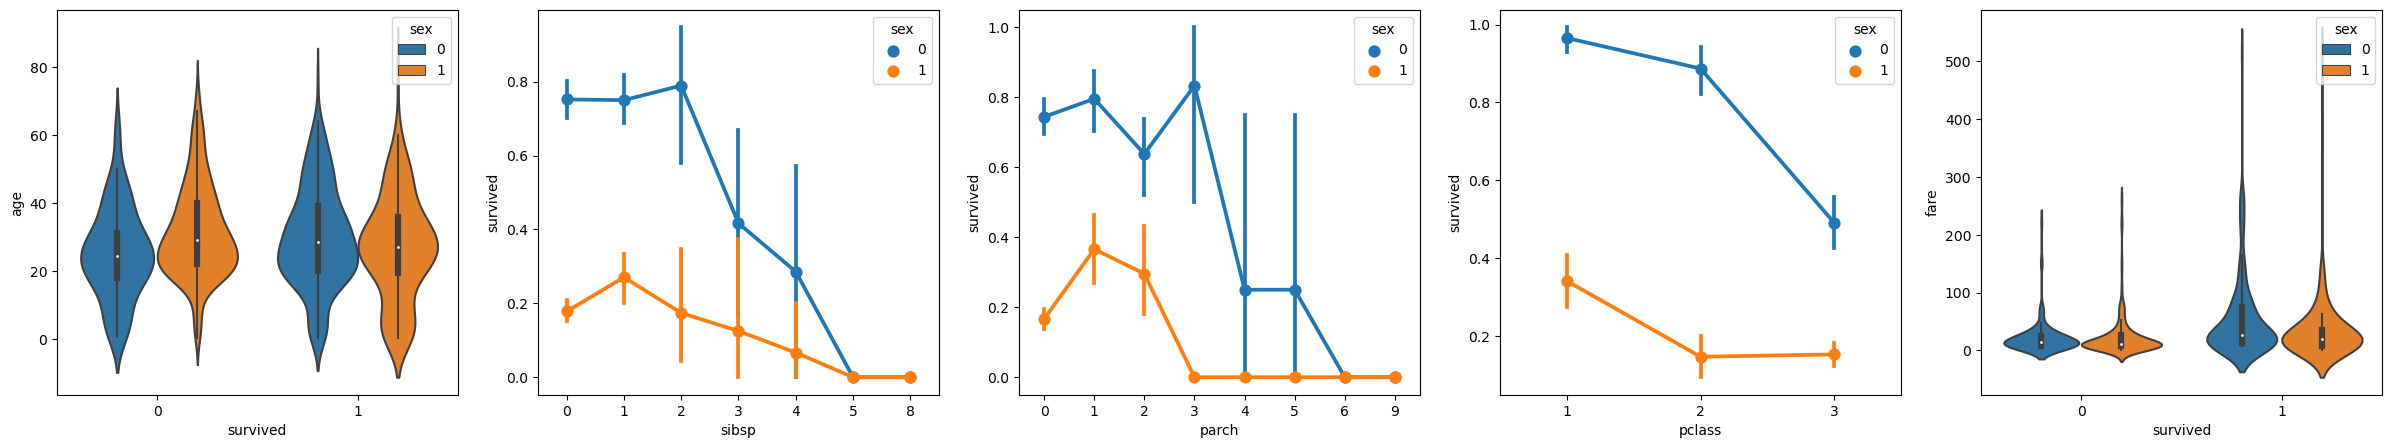

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [13]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()


In [14]:
# SPLIT DATA
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [15]:
#NORMALIZE
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [18]:
#MODEL
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [19]:
#TEST
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [ ]:
# # Nural network

In [20]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.summary()

2023-08-25 21:25:30.038366: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-25 21:25:37.310126: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 21:26:01.380758: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-25 21:26:35.293256: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66 (264.00 Byte)
Trainable params: 66 (264.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=302, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.7990
Epoch 2/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.7978
Epoch 3/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.7990
Epoch 4/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8002
Epoch 5/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8002
Epoch 6/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.8002
Epoch 7/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8014
Epoch 8/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8002
Epoch 9/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8002
Epoch 10/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.8002
Epoch 11/1000
3/3 [

In [25]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 639us/step
0.8038277511961722
